In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data preprocessing useful function
from sklearn.preprocessing import LabelEncoder

# Data scaling
# normalization
from sklearn.preprocessing import MinMaxScaler

# standardization
from sklearn.preprocessing import StandardScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Algorithm
from sklearn.linear_model import LogisticRegression

# Functions for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
#load data(sometimes need to use "/")
df = pd.read_csv('C:/Users/user/Desktop/Final_assignment/Data/中風.csv',encoding='big5')
df

,序列,性別,年齡,高血壓,心臟病,結過婚,工作類型,居住類型,平均血糖水平,BMI,吸煙狀況,中風
0,1,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,2,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,3,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,4,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,5,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,5106,Female,80.0,Yes,No,Yes,Private,Urban,83.75,NaN,never smoked,No
5106,5107,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,5108,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,5109,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


# 1. Quick overview to get a grasp of the data set

In [3]:
# 1.1 Easiest way to check data type and if there are any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序列      5110 non-null   int64  
 1   性別      5109 non-null   object 
 2   年齡      5110 non-null   float64
 3   高血壓     5110 non-null   object 
 4   心臟病     5110 non-null   object 
 5   結過婚     5110 non-null   object 
 6   工作類型    5110 non-null   object 
 7   居住類型    5110 non-null   object 
 8   平均血糖水平  5110 non-null   float64
 9   BMI     4909 non-null   float64
 10  吸煙狀況    5110 non-null   object 
 11  中風      5110 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 479.2+ KB


In [4]:
# 1.2 Show the correct descriptive statistics
df.describe()

,序列,年齡,平均血糖水平,BMI
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,2555.500000,43.226614,106.147677,28.893237
std,1475.274268,22.612647,45.283560,7.854067
min,1.000000,0.080000,55.120000,10.300000
25%,1278.250000,25.000000,77.245000,23.500000
50%,2555.500000,45.000000,91.885000,28.100000
75%,3832.750000,61.000000,114.090000,33.100000
max,5110.000000,82.000000,271.740000,97.600000


In [5]:
df.describe()

,序列,年齡,平均血糖水平,BMI
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,2555.500000,43.226614,106.147677,28.893237
std,1475.274268,22.612647,45.283560,7.854067
min,1.000000,0.080000,55.120000,10.300000
25%,1278.250000,25.000000,77.245000,23.500000
50%,2555.500000,45.000000,91.885000,28.100000
75%,3832.750000,61.000000,114.090000,33.100000
max,5110.000000,82.000000,271.740000,97.600000


In [6]:
# 1.3 Add include='all' to select all columns
df.describe(include='all')

,序列,性別,年齡,高血壓,心臟病,結過婚,工作類型,居住類型,平均血糖水平,BMI,吸煙狀況,中風
count,5110.000000,5109,5110.000000,5110,5110,5110,5110,5110,5110.000000,4909.000000,5110,5110
unique,NaN,2,NaN,2,2,2,5,2,NaN,NaN,4,2
top,NaN,Female,NaN,No,No,Yes,Private,Urban,NaN,NaN,never smoked,No
freq,NaN,2994,NaN,4612,4834,3353,2925,2596,NaN,NaN,1892,4861
mean,2555.500000,NaN,43.226614,NaN,NaN,NaN,NaN,NaN,106.147677,28.893237,NaN,NaN
std,1475.274268,NaN,22.612647,NaN,NaN,NaN,NaN,NaN,45.283560,7.854067,NaN,NaN
min,1.000000,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,55.120000,10.300000,NaN,NaN
25%,1278.250000,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,77.245000,23.500000,NaN,NaN
50%,2555.500000,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,91.885000,28.100000,NaN,NaN
75%,3832.750000,NaN,61.000000,NaN,NaN,NaN,NaN,NaN,114.090000,33.100000,NaN,NaN


In [7]:
# 1.4 Using value_counts function to count frequency in categorical column
print(df[['性別']].value_counts(sort=True))
print('+-----------------------+')
print(df[['高血壓']].value_counts(sort=True))
print('+-----------------------+')
print(df[['心臟病']].value_counts(sort=True))
print('+-----------------------+')
print(df[['結過婚']].value_counts(sort=True))
print('+-----------------------+')
print(df[['工作類型']].value_counts(sort=True))
print('+-----------------------+')
print(df[['居住類型']].value_counts(sort=True))
print('+-----------------------+')
print(df[['吸煙狀況']].value_counts(sort=True))
print('+-----------------------+')
print(df[['中風']].value_counts(sort=True))

性別    
Female    2994
Male      2115
dtype: int64
+-----------------------+
高血壓
No     4612
Yes     498
dtype: int64
+-----------------------+
心臟病
No     4834
Yes     276
dtype: int64
+-----------------------+
結過婚
Yes    3353
No     1757
dtype: int64
+-----------------------+
工作類型         
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
dtype: int64
+-----------------------+
居住類型 
Urban    2596
Rural    2514
dtype: int64
+-----------------------+
吸煙狀況           
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64
+-----------------------+
中風 
No     4861
Yes     249
dtype: int64


In [8]:
# Tips: row,column
df[['年齡','平均血糖水平','BMI']].describe()

,年齡,平均血糖水平,BMI
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


# 2. Data preprocessing

In [9]:
#缺失值個數
# num = df['BMI'].isna().sum()
# num
# 2.1 Deal with missing value by dropping it
new_df=df.dropna(axis=0, how='any')
new_df

,序列,性別,年齡,高血壓,心臟病,結過婚,工作類型,居住類型,平均血糖水平,BMI,吸煙狀況,中風
0,1,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,3,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,4,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,5,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,6,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,5105,Female,13.0,No,No,No,children,Rural,103.08,18.6,Unknown,No
5106,5107,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,5108,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,5109,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [10]:
# 刪除不要的column
new_df=new_df.drop(['序列'],axis = 1).copy()
new_df

,性別,年齡,高血壓,心臟病,結過婚,工作類型,居住類型,平均血糖水平,BMI,吸煙狀況,中風
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,No,No,No,children,Rural,103.08,18.6,Unknown,No
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [11]:
#刪除吸菸狀況為Unknown的資料
new_df=new_df[ ~ new_df['吸煙狀況'].str.contains('Unknown') ]
new_df

,性別,年齡,高血壓,心臟病,結過婚,工作類型,居住類型,平均血糖水平,BMI,吸煙狀況,中風
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5100,Male,82.0,Yes,No,Yes,Self-employed,Rural,71.97,28.3,never smoked,No
5102,Female,57.0,No,No,Yes,Private,Rural,77.93,21.7,never smoked,No
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No


In [12]:
new_df.columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','Y']
new_df.to_csv('C:/Users/user/Desktop/Final_assignment/Data/中風_deleteNA.csv',index=False,encoding='big5')
print('Export complete...')

Export complete...


In [13]:
new_df = pd.read_csv('C:/Users/user/Desktop/Final_assignment/Data/中風_deleteNA_01.csv',encoding='big5')
new_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,1,67,0,1,1,3,2,228.69,36.6,2,1
1,1,80,0,1,1,3,1,105.92,32.5,1,1
2,2,49,0,0,1,3,2,171.23,34.4,3,1
3,2,79,1,0,1,4,1,174.12,24.0,1,1
4,1,81,0,0,1,3,2,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
3420,1,82,1,0,1,4,1,71.97,28.3,1,0
3421,2,57,0,0,1,3,1,77.93,21.7,1,0
3422,2,81,0,0,1,4,2,125.20,40.0,1,0
3423,2,35,0,0,1,4,1,82.99,30.6,1,0


In [14]:
# Recheck the descriptive statistics
new_df[['X2','X8','X9']].describe()

,X2,X8,X9
count,3425.000000,3425.000000,3425.000000
mean,48.652555,108.311670,30.292350
std,18.850018,47.706754,7.295778
min,10.000000,55.120000,11.500000
25%,34.000000,77.230000,25.300000
50%,50.000000,92.350000,29.100000
75%,63.000000,116.200000,34.100000
max,82.000000,271.740000,92.000000


In [15]:
new_df[['X1','X3','X4','X5','X6','X7','X10','Y']]=new_df[['X1','X3','X4','X5','X6','X7','X10','Y']].astype(str)

In [16]:
# Recheck the descriptive statistics
# print(new_df[['X1']].value_counts(sort=True)/ len(new_df.X1)) #計算百分比
print(new_df[['X1']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X3']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X4']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X5']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X6']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X7']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['X10']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Y']].value_counts(sort=True))

X1
2     2086
1     1339
dtype: int64
+-----------------------+
X3
0     3017
1      408
dtype: int64
+-----------------------+
X4
0     3219
1      206
dtype: int64
+-----------------------+
X5
1     2599
0      826
dtype: int64
+-----------------------+
X6
3     2200
4      629
5      514
1       68
2       14
dtype: int64
+-----------------------+
X7
2     1745
1     1680
dtype: int64
+-----------------------+
X10
1      1852
2       836
3       737
dtype: int64
+-----------------------+
Y
0    3245
1     180
dtype: int64


In [17]:
new_df.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
count,3425,3425.000000,3425,3425,3425,3425,3425,3425.000000,3425.000000,3425,3425
unique,2,NaN,2,2,2,5,2,NaN,NaN,3,2
top,2,NaN,0,0,1,3,2,NaN,NaN,1,0
freq,2086,NaN,3017,3219,2599,2200,1745,NaN,NaN,1852,3245
mean,NaN,48.652555,NaN,NaN,NaN,NaN,NaN,108.311670,30.292350,NaN,NaN
std,NaN,18.850018,NaN,NaN,NaN,NaN,NaN,47.706754,7.295778,NaN,NaN
min,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,55.120000,11.500000,NaN,NaN
25%,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,77.230000,25.300000,NaN,NaN
50%,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,92.350000,29.100000,NaN,NaN
75%,NaN,63.000000,NaN,NaN,NaN,NaN,NaN,116.200000,34.100000,NaN,NaN


In [18]:
# 2.2 Using unique function to check category label
print('X1',new_df['X1'].unique())
print('X3',new_df['X3'].unique())
print('X4',new_df['X4'].unique())
print('X5',new_df['X5'].unique())
print('X6',new_df['X6'].unique())
print('X7',new_df['X7'].unique())
print('X10',new_df['X10'].unique())
print('Y',new_df['Y'].unique())

X1 ['1' '2']
X3 ['0' '1']
X4 ['1' '0']
X5 ['1' '0']
X6 ['3' '4' '5' '1' '2']
X7 ['2' '1']
X10 ['2' '1' '3']
Y ['1' '0']


In [19]:
#2.3 Using mapping to code labels
demo_mapping=new_df.copy()

# create dictionary for labels
mapping_X1={'Male':1,'Female':2}
mapping_X3={'No':0,'Yes':1}
mapping_X4={'No':0,'Yes':1}
mapping_X5={'No':0,'Yes':1}
mapping_X6={'children':1,'Never_worked':2,'Private':3,'Self-employed':4,'Govt_job':5}
mapping_X7={'Rural':1,'Urban':2}
mapping_X10={'never smoked':1,'formerly smoked':2,'smokes':3}
mapping_Y={'No':0,'Yes':1}

# using map function

demo_mapping['X1']=demo_mapping['X1'].map(mapping_X1)
demo_mapping['X3']=demo_mapping['X3'].map(mapping_X3)
demo_mapping['X4']=demo_mapping['X4'].map(mapping_X4)
demo_mapping['X5']=demo_mapping['X5'].map(mapping_X5)
demo_mapping['X6']=demo_mapping['X6'].map(mapping_X6)
demo_mapping['X7']=demo_mapping['X7'].map(mapping_X7)
demo_mapping['X10']=demo_mapping['X10'].map(mapping_X10)
demo_mapping['Y']=demo_mapping['Y'].map(mapping_Y)
demo_mapping.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
0,NaN,67,NaN,NaN,NaN,NaN,NaN,228.69,36.6,NaN,NaN
1,NaN,80,NaN,NaN,NaN,NaN,NaN,105.92,32.5,NaN,NaN
2,NaN,49,NaN,NaN,NaN,NaN,NaN,171.23,34.4,NaN,NaN
3,NaN,79,NaN,NaN,NaN,NaN,NaN,174.12,24.0,NaN,NaN
4,NaN,81,NaN,NaN,NaN,NaN,NaN,186.21,29.0,NaN,NaN


In [20]:
#2.4 Using pd.get_dummies function to generate dummies
dummied_new_df=pd.get_dummies(new_df,columns=['X1','X3','X4','X5','X6','X7','X10','Y']).copy()
dummied_new_df.head()

,X2,X8,X9,X1_1,X1_2,X3_0,X3_1,X4_0,X4_1,X5_0,...,X6_3,X6_4,X6_5,X7_1,X7_2,X10_1,X10_2,X10_3,Y_0,Y_1
0,67,228.69,36.6,1,0,1,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
1,80,105.92,32.5,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
2,49,171.23,34.4,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1
3,79,174.12,24.0,0,1,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
4,81,186.21,29.0,1,0,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1


In [21]:
# Export to CSV file Note: preset folder path is required
dummied_new_df.to_csv('C:/Users/user/Desktop/Final_assignment/Data/中風_deleteNA_dummies.csv',index=False, header=True,encoding='big5')
print('Export complete...')

Export complete...


# 資料可視化、交叉表、檢定

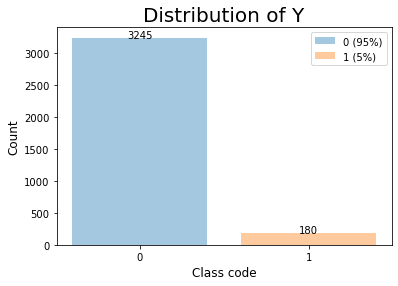

In [22]:
#類別變數資料可視化
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='retina'
x=['0','1']
y=[3245,180]


plt.bar(x[0],y[0],align='center',alpha=0.4,label='0 (95%)')
plt.bar(x[1],y[1],align='center',alpha=0.4,label='1 (5%)')

plt.title("Distribution of Y",fontsize="20")
plt.xlabel("Class code",fontsize="12")
plt.ylabel("Count",fontsize="12")
plt.legend(loc='best')
for x,y in enumerate(y):plt.text(x,y,'%s'%y,ha='center')
plt.show()

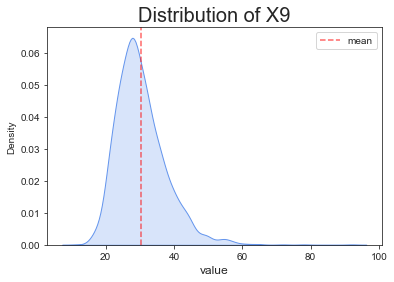

In [23]:
#連續變數資料可視化
import seaborn as sns
sns.set_style('ticks')
import matplotlib.pyplot as plt

sns.kdeplot(new_df['X9'],shade=True,color='cornflowerblue')#出的概率密度曲线
plt.axvline(new_df['X9'].mean(), label='mean',linestyle='--', color='red',alpha=0.6)

plt.title("Distribution of X9",fontsize="20")
plt.xlabel("value",fontsize="12")
plt.legend()
plt.show()

In [24]:
#列聯表(計算個數)(類別變數)
pd.crosstab(new_df['X10'], new_df['Y'], margins=True, margins_name="合計")

Y,0,1,合計
X10,,,
1,1768,84,1852
2,779,57,836
3,698,39,737
合計,3245,180,3425


In [80]:
#列聯表(計算比例)
pd.crosstab(new_df['X6'], new_df['Y'], normalize='columns')

Y,0,1
X6,,
1,0.020955,0.000000
2,0.004314,0.000000
3,0.644376,0.605556
4,0.179045,0.266667
5,0.151310,0.127778


In [26]:
from scipy.stats import chi2_contingency
observed = [pd.crosstab(new_df['X10'], new_df['Y'])]
chi2, p, dof, expected = chi2_contingency(observed)
print('chi-square:', chi2)
print('p-value:', p)
print('degree of freedom:', dof)
print('expected value table:', expected)
if p >= 0.05:
    print('H0 is accepted')
else:
    print('H0 is rejected')

chi-square: 6.029329889790983
p-value: 0.049062271297848944
degree of freedom: 2
expected value table: [[[1754.66861314   97.33138686]
  [ 792.06423358   43.93576642]
  [ 698.26715328   38.73284672]]]
H0 is rejected


In [52]:
#計算 Odds Ratio
from sklearn.linear_model import LogisticRegression
df=pd.get_dummies(new_df,drop_first=True)
clf = LogisticRegression(penalty='none')
clf.fit(new_df[['X6']], new_df[['Y']].values)
odds_ratio=np.exp(clf.coef_)

print(odds_ratio)


[[1.13447335]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
#計算 Odds Ratio
from sklearn.linear_model import LogisticRegression
# df=pd.get_dummies(new_df,drop_first=True)
clf = LogisticRegression(penalty='none')
clf.fit(dummied_new_df[['X8']], dummied_new_df[['Y_1']].values)
odds_ratio=np.exp(clf.coef_)

print(odds_ratio)


[[1.01016728]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
import scipy.stats as stats

oddsratio, pvalue = stats.fisher_exact(pd.crosstab(new_df['X3'], new_df['Y']))
print("OddsR: ", oddsratio,'Pvalue',pvalue)

OddsR:  3.82086025988465 Pvalue 3.134678618511207e-13


In [33]:
#計算連續變數裡有無中風的平均數、標準差
Y_0=(new_df.Y == '0')
new_df[Y_0]
Y_1=(new_df.Y == '1')
X9_Y0_mean=np.mean(new_df[Y_0].X9)
X9_Y0_std=np.std(new_df[Y_0].X9)
print("0_meam:",X9_Y0_mean,"std:",X9_Y0_std)

X9_Y1_mean=np.mean(new_df[Y_1].X9)
X9_Y1_std=np.std(new_df[Y_1].X9)
print("1_meam:",X9_Y1_mean,"std:",X9_Y1_std)

0_meam: 30.272419106317408 std: 7.345672006670919
1_meam: 30.651666666666667 std: 6.294966904864024


In [34]:
from scipy import stats
# stats.levene(new_df[Y_0].X8,new_df[Y_1].X8)
stats.ttest_ind(new_df[Y_0].X9,new_df[Y_1].X9,equal_var=False)

Ttest_indResult(statistic=-0.7773635056880392, pvalue=0.43783249490055276)